In [157]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

# import datetime class from datetime module

from datetime import datetime

In [158]:
# Load the Universal bank data

census = pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\census.csv", header=0)
submission = pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\test_census.csv")

# Copy to back-up file

census_bk = census.copy()

# Display first 5 records

census.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [159]:
submission.head()

,Unnamed: 0,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0,21.0,Private,10th,6.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States
1,1,49.0,Private,Bachelors,13.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.0,0.0,40.0,United-States
2,2,44.0,Self-emp-not-inc,Assoc-acdm,12.0,Married-civ-spouse,Other-service,Wife,White,Female,0.0,0.0,99.0,United-States
3,3,34.0,Private,Bachelors,13.0,Married-civ-spouse,Sales,Husband,White,Male,7298.0,0.0,46.0,United-States
4,4,24.0,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States


In [160]:
#remove unwanted columns in submission dataset
del submission['Unnamed: 0']

In [161]:
#checking the info of the census dataset
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45205 non-null  float64
 1   workclass        45200 non-null  object 
 2   education_level  45202 non-null  object 
 3   education-num    45208 non-null  float64
 4   marital-status   45201 non-null  object 
 5   occupation       45200 non-null  object 
 6   relationship     45206 non-null  object 
 7   race             45203 non-null  object 
 8   sex              45203 non-null  object 
 9   capital-gain     45207 non-null  float64
 10  capital-loss     45205 non-null  float64
 11  hours-per-week   45209 non-null  float64
 12  native-country   45206 non-null  object 
dtypes: float64(5), object(8)
memory usage: 4.5+ MB


In [162]:
#checking the info of the census dataset
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [163]:
#we need to convert string into int. in submission dataset
#by using LabelEncodeer/LabelBinarizer(if our variable is having two categories)/ maually(if that variable is in ordinal'fallow the order) etc.
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
submission['marital-status'] = le.fit_transform(submission['marital-status'])
submission['occupation'] = le.fit_transform(submission['occupation'])
submission['relationship'] = le.fit_transform(submission['relationship'])
submission['native-country'] = le.fit_transform(submission['native-country'])
submission['workclass'] = le.fit_transform(submission['workclass'])
submission['education_level'] = le.fit_transform(submission['education_level'])


submission['race'] = le.fit_transform(submission['race'])
submission['sex'] = le.fit_transform(submission['sex'])


In [164]:
#again checking the info of the submission dataset
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45205 non-null  float64
 1   workclass        45222 non-null  int32  
 2   education_level  45222 non-null  int32  
 3   education-num    45208 non-null  float64
 4   marital-status   45222 non-null  int32  
 5   occupation       45222 non-null  int32  
 6   relationship     45222 non-null  int32  
 7   race             45222 non-null  int32  
 8   sex              45222 non-null  int32  
 9   capital-gain     45207 non-null  float64
 10  capital-loss     45205 non-null  float64
 11  hours-per-week   45209 non-null  float64
 12  native-country   45222 non-null  int32  
dtypes: float64(5), int32(8)
memory usage: 3.1 MB


In [165]:
#we need to convert string into int.
#by using LabelEncodeer/LabelBinarizer(if our variable is having two categories)/ maually(if that variable is in ordinal'fallow the order) etc.
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
census['marital-status'] = le.fit_transform(census['marital-status'])
census['occupation'] = le.fit_transform(census['occupation'])
census['relationship'] = le.fit_transform(census['relationship'])
census['native-country'] = le.fit_transform(census['native-country'])
census['workclass'] = le.fit_transform(census['workclass'])
census['education_level'] = le.fit_transform(census['education_level'])

#by using LabelBinarizer
from sklearn.preprocessing import LabelBinarizer
lb =LabelBinarizer()
census['race'] = lb.fit_transform(census['race'])
census['sex'] = lb.fit_transform(census['sex'])

#by using manually


In [166]:
#checking the info of the census dataset
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  int32  
 2   education_level  45222 non-null  int32  
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  int32  
 5   occupation       45222 non-null  int32  
 6   relationship     45222 non-null  int32  
 7   race             45222 non-null  int32  
 8   sex              45222 non-null  int32  
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  int32  
 13  income           45222 non-null  object 
dtypes: float64(4), int32(8), int64(1), object(1)
memory usage: 3.5+ MB


In [167]:
#here we need to do manually but its optional
census.education_level.value_counts()

11    14783
15     9899
9      7570
12     2514
8      1959
1      1619
7      1507
0      1223
5       823
14      785
6       676
2       577
10      544
4       449
3       222
13       72
Name: education_level, dtype: int64

In [168]:
'''#remove unwanted columns
del census['education-num']
del census['race']
del census['sex']
#del census['capital-gain']
#del census['capital-loss']
del census['marital-status']'''

"#remove unwanted columns\ndel census['education-num']\ndel census['race']\ndel census['sex']\n#del census['capital-gain']\n#del census['capital-loss']\ndel census['marital-status']"

In [169]:
#we need to convert income as a object to int.(income is our target variable)
census.income.value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [170]:
#by using LabelBinarizer
census['income'] = lb.fit_transform(census['income'])

In [172]:
#we need to checking the null values in census dataset
census.isna().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [175]:
#we need to checking the null values in submission dataset
submission.isnull().sum()

age                17
workclass           0
education_level     0
education-num      14
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain       15
capital-loss       17
hours-per-week     13
native-country      0
dtype: int64

In [176]:
submission.isnull().sum()

age                17
workclass           0
education_level     0
education-num      14
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain       15
capital-loss       17
hours-per-week     13
native-country      0
dtype: int64

In [177]:
#using backward filling method.
submission.fillna(method='bfill',inplace=True)

In [178]:
#checking the duplicate values
census.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45217    False
45218    False
45219     True
45220    False
45221    False
Length: 45222, dtype: bool

In [179]:
#Create a single column.

census['capital-net'] = census['capital-gain'] - census['capital-loss']
submission['capital-net'] = submission['capital-gain'] - submission['capital-loss']

In [180]:
census.head(1)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,capital-net
0,39,5,9,13.0,4,0,1,0,1,2174.0,0.0,40.0,38,0,2174.0


In [184]:
del census['capital-gain']
del census['capital-loss']

In [135]:
submission.head(1)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,capital-net
0,21.0,2,0,6.0,2,2,0,4,1,0.0,0.0,40.0,38,0.0


In [185]:
del submission['capital-gain']
del submission['capital-loss']

In [186]:
submission.head(1)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,capital-net
0,21.0,2,0,6.0,2,2,0,4,1,40.0,38,0.0


In [187]:
census.head(1)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,capital-net
0,39,5,9,13.0,4,0,1,0,1,40.0,38,0,2174.0


In [189]:
#count the target variable in our dataset
income_count = census.income.value_counts()
print('minor:',income_count[0]);
print('major:',income_count[1]);
print('ratio:',round(income_count[0]/income_count[1],2),':1')
print('total records in census:',len(census))

minor: 34014
major: 11208
ratio: 3.03 :1
total records in census: 45222


In [190]:
# Identify the Independent and Target variables
independent_var=[]
for col in census.columns:
    if col!='income':
        independent_var.append(col)
target_var='income'

x=census[independent_var]
y=census[target_var]

In [191]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((31655, 12), (13567, 12), (31655,), (13567,))

In [192]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [193]:
#resultant dataset
census_Results = pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\bank_reults _022.csv")
census_Results

,Model Name,True Positive,False Positive,True Negative,False Negative,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy,Accuracy


Method:  RandomForestClassifier(random_state=42)
Confusion matrix : 
 [[2040 1334]
 [ 884 9309]]
Outcome values : 
 2040 1334 884 9309
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.60      0.65      3374
           0       0.87      0.91      0.89     10193

    accuracy                           0.84     13567
   macro avg       0.79      0.76      0.77     13567
weighted avg       0.83      0.84      0.83     13567

Accuracy : 83.7 %
Precision : 69.8 %
Recall : 60.5 %
F1 Score : 0.648
Balanced Accuracy : 75.9 %
MCC : 0.544
roc_auc_score: 0.759


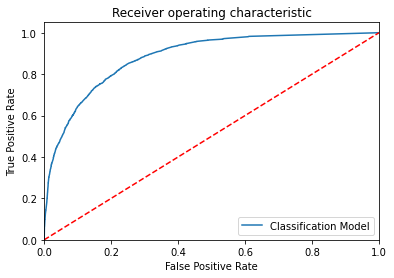

-----------------------------------------------------------------------
Method:  LogisticRegression(random_state=42)
Confusion matrix : 
 [[1381 1993]
 [ 519 9674]]
Outcome values : 
 1381 1993 519 9674
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.41      0.52      3374
           0       0.83      0.95      0.89     10193

    accuracy                           0.81     13567
   macro avg       0.78      0.68      0.70     13567
weighted avg       0.80      0.81      0.80     13567

Accuracy : 81.5 %
Precision : 72.7 %
Recall : 40.9 %
F1 Score : 0.524
Balanced Accuracy : 67.9 %
MCC : 0.446
roc_auc_score: 0.679


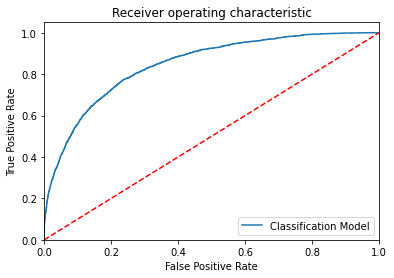

-----------------------------------------------------------------------
Method:  DecisionTreeClassifier(random_state=42)
Confusion matrix : 
 [[1881 1493]
 [1313 8880]]
Outcome values : 
 1881 1493 1313 8880
Classification report : 
               precision    recall  f1-score   support

           1       0.59      0.56      0.57      3374
           0       0.86      0.87      0.86     10193

    accuracy                           0.79     13567
   macro avg       0.72      0.71      0.72     13567
weighted avg       0.79      0.79      0.79     13567

Accuracy : 79.3 %
Precision : 58.9 %
Recall : 55.7 %
F1 Score : 0.573
Balanced Accuracy : 71.4 %
MCC : 0.437
roc_auc_score: 0.714


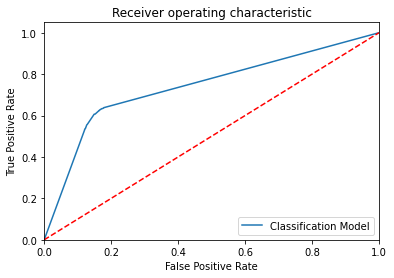

-----------------------------------------------------------------------
Method:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42,
              reg_alpha=None, reg_lambda=None, ...)
Confusion matrix : 
 [[ 1066  2308]
 [  161 10032]]
Outcome values : 
 1066 2308 161 10032
Classification report : 
               precision    recall  f1-score   support

        

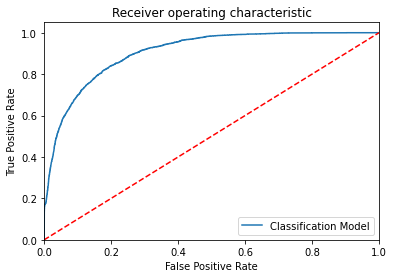

-----------------------------------------------------------------------


In [194]:
# Checking accuracy by changing base estimator - 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
#from sklearn.svm import SVC
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import BaggingClassifier
#from sklearn.ensemble import GradientBoostingClassifier

# Build the model

modelLR = LogisticRegression(random_state=42)
modelRF = RandomForestClassifier(random_state=42)
modelDT= DecisionTreeClassifier(random_state =42)
modelXGB = XGBClassifier(random_state=42)
#modelSVMGaussian = SVC(kernel='rbf', random_state = None, class_weight=None,probability=True)
#modelKNN = KNeighborsClassifier()
#modeleETC =ExtraTreesClassifier()
#modelGNB =GaussianNB()
#modelAB=AdaBoostClassifier()
#modelBC =BaggingClassifier(base_estimator=None)
#modelGBC=GradientBoostingClassifier()

MM = [ modelRF,modelLR,modelDT, modelXGB]
for Models in MM:
    print("Method: ", Models)
        
    # fit the model with train data
    
    Models.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = Models.predict(x_test)
    y_pred_prob = Models.predict_proba(x_test)
    
    # Evaluate the model performance by metrics
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    matrix = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n',matrix)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3)
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test,Models.predict_proba(x_test)[:,1])
    plt.figure()
    
    # plt.plot
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    
    print('-----------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------
    new_row = {'Model Name' : Models,
               'True Positive':tp,
               'True Negative':tn,
               'False Positive':fp,
               'False Negative':fn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    census_Results = census_Results.append(new_row, ignore_index=True)
    #-------------------------------------------------------------------------------------

In [195]:
census_Results

,Model Name,True Positive,False Positive,True Negative,False Negative,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy,Accuracy
0,"(DecisionTreeClassifier(max_features='auto', r...",2040,884,9309,1334,0.698,0.605,0.648,0.913,0.544,0.758949,0.759,0.837
1,LogisticRegression(random_state=42),1381,519,9674,1993,0.727,0.409,0.524,0.949,0.446,0.679195,0.679,0.815
2,DecisionTreeClassifier(random_state=42),1881,1313,8880,1493,0.589,0.557,0.573,0.871,0.437,0.714342,0.714,0.793
3,"XGBClassifier(base_score=0.5, booster='gbtree'...",1066,161,10032,2308,0.869,0.316,0.463,0.984,0.452,0.650075,0.65,0.818


Feature: 0, Score: 0.22674
Feature: 1, Score: 0.04959
Feature: 2, Score: 0.03603
Feature: 3, Score: 0.09457
Feature: 4, Score: 0.08604
Feature: 5, Score: 0.08655
Feature: 6, Score: 0.10989
Feature: 7, Score: 0.00202
Feature: 8, Score: 0.01440
Feature: 9, Score: 0.11484
Feature: 10, Score: 0.02247
Feature: 11, Score: 0.15686


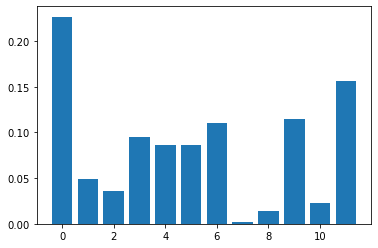

In [196]:
# To get feature importance

from matplotlib import pyplot

importance =modelRF.feature_importances_

# Summarize feature importance

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# Plot feature importance

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [197]:
predict_prob = modelXGB.predict_proba(submission)

In [198]:
Final_Submission = pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\example_submission.csv")
Final_Submission.head()

,id,income
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


In [199]:
Final_Submission.income = predict_prob[:,1]

In [200]:
Final_Submission.head(10)

,id,income
0,0,0.391683
1,1,0.449543
2,2,0.715969
3,3,0.814577
4,4,0.430719
5,5,0.241651
6,6,0.430719
7,7,0.430719
8,8,0.722155
9,9,0.430719
